<a href="https://colab.research.google.com/github/Liso15/Projects/blob/main/Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def GetData(filename):
    return pd.read_csv(filename)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ARDRegression, SGDRegressor

In [ ]:
st = GetData('Stores.csv')
st

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [ ]:
st.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


EDA

Palette

In [ ]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#95AC41', '#E56F3E']

In [ ]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


Univariate analysis-swarm plot

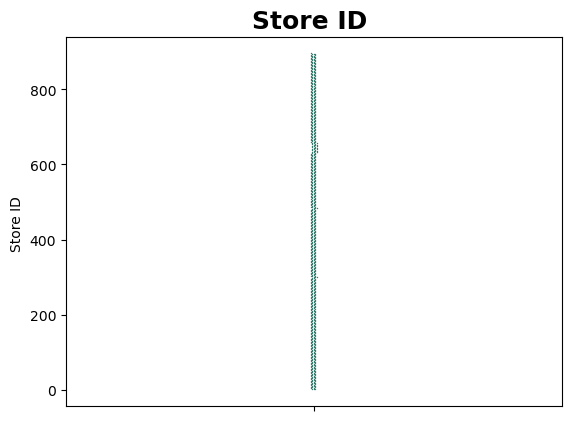

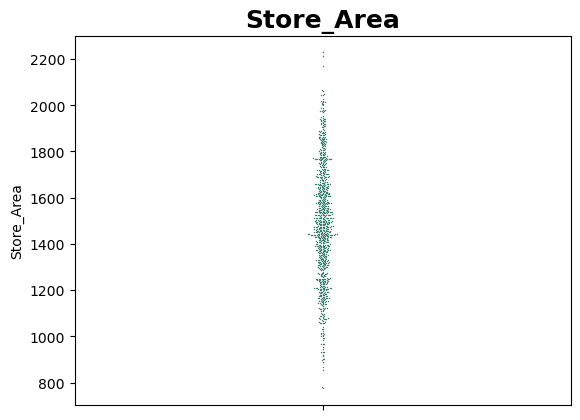

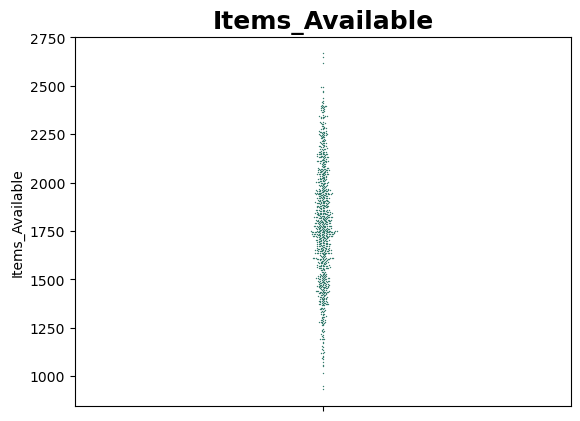

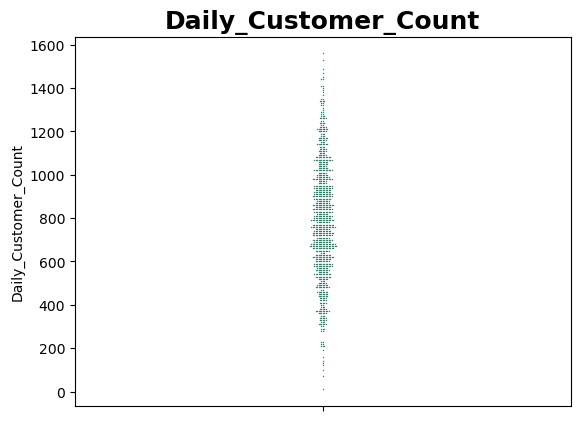

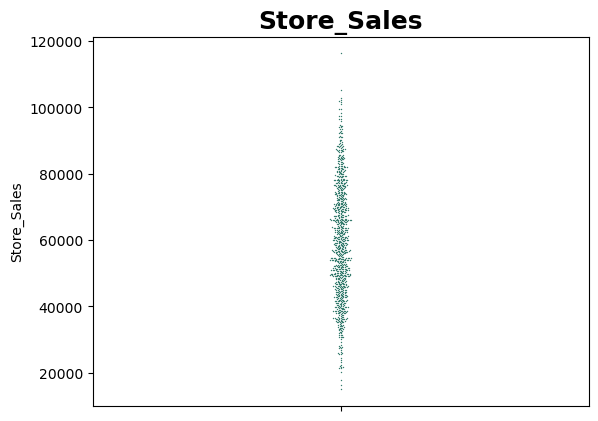

In [ ]:
# for loop
for feat in st.columns:
    sns.swarmplot (data=st, y= feat, s=1, color=palette[0])
    plt.title (feat, fontsize= 18, fontweight= 'bold')
    plt.show()


Univariate analysis - violin plot

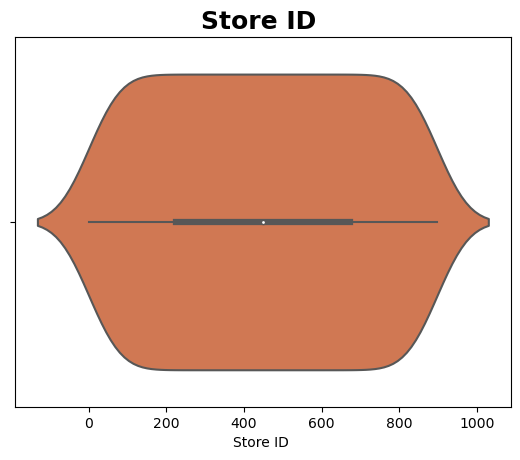

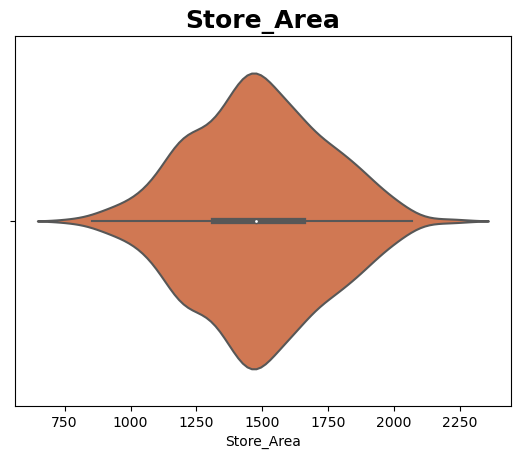

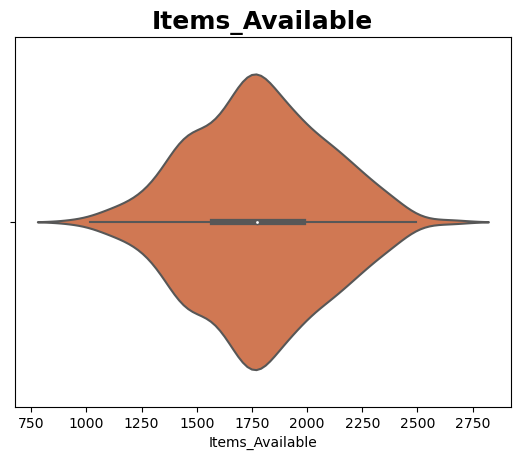

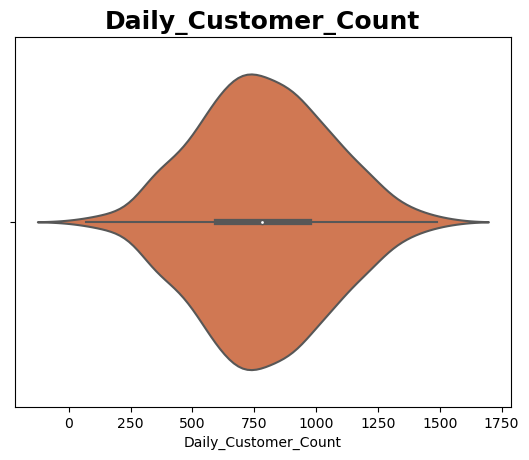

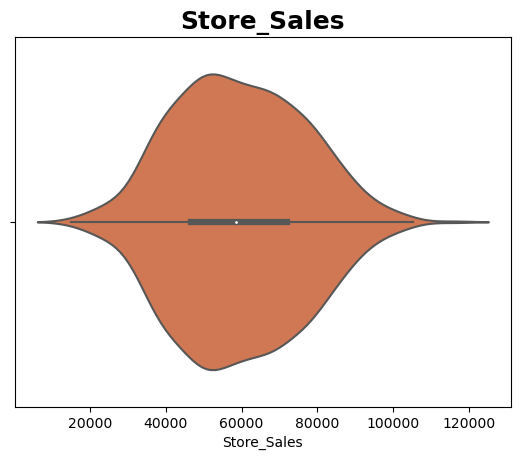

In [ ]:
# for loop with violineplot
for feat in st.columns:
    sns.violinplot ( data=st , x= feat , showfliers= False, color=palette[4])
    plt.title(feat, fontsize= 18, fontweight='bold')
    plt.show()

Bivariate Analysis

In [ ]:
st.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

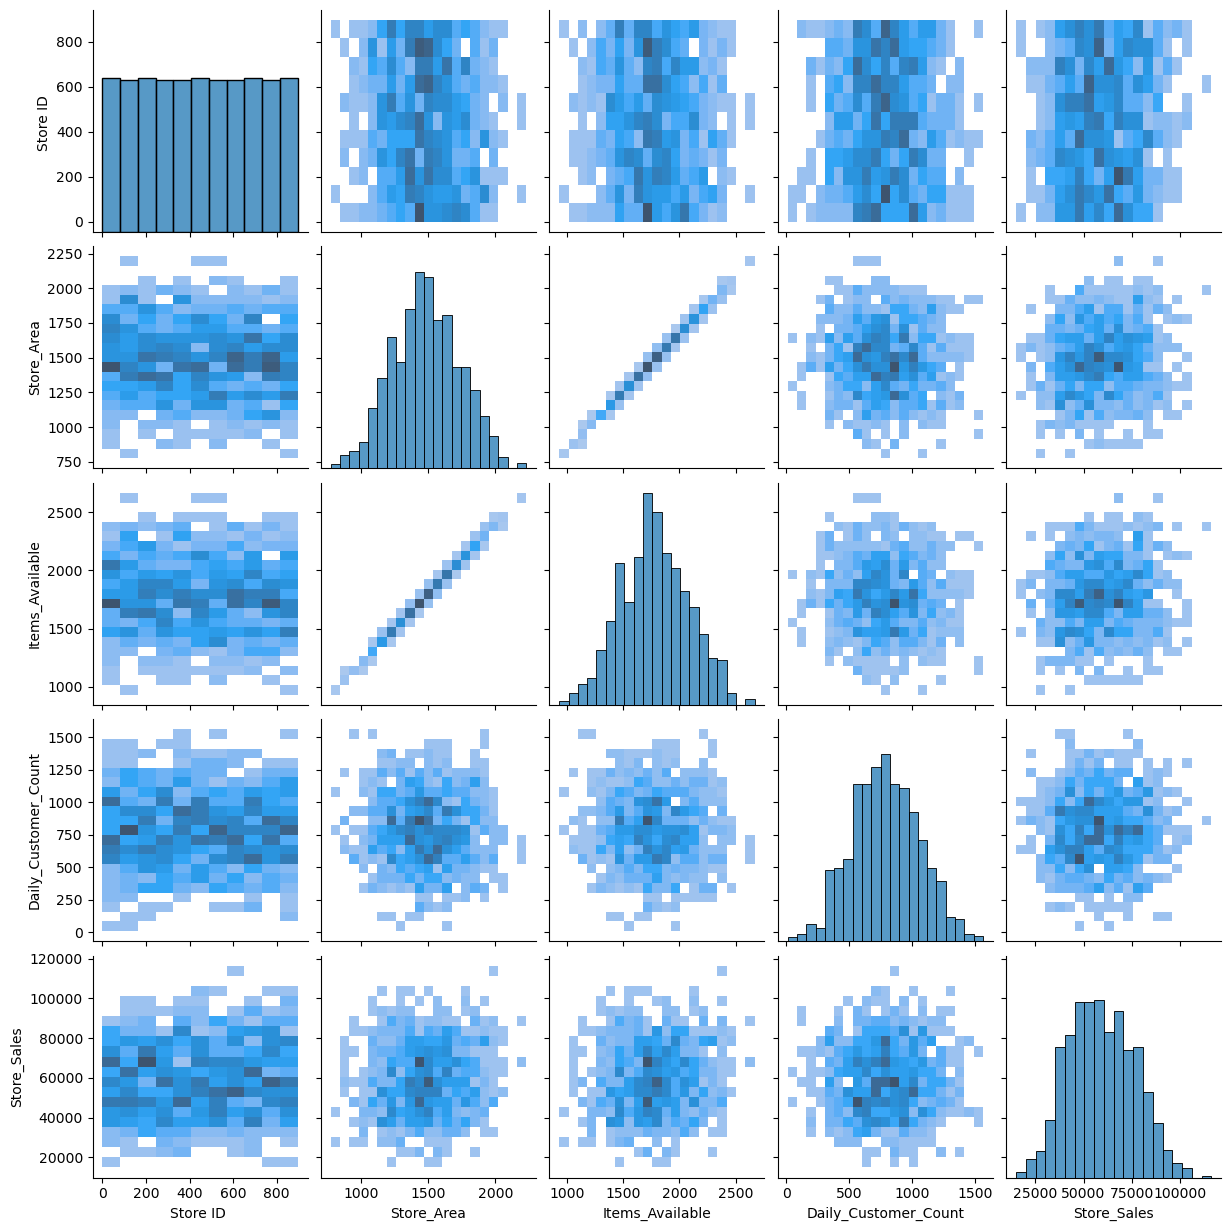

In [ ]:
sns.pairplot (st.iloc[ : , :], kind='hist')

Correlation measure

Text(0.5, 1.0, 'Heatmap of correlation Matrix')

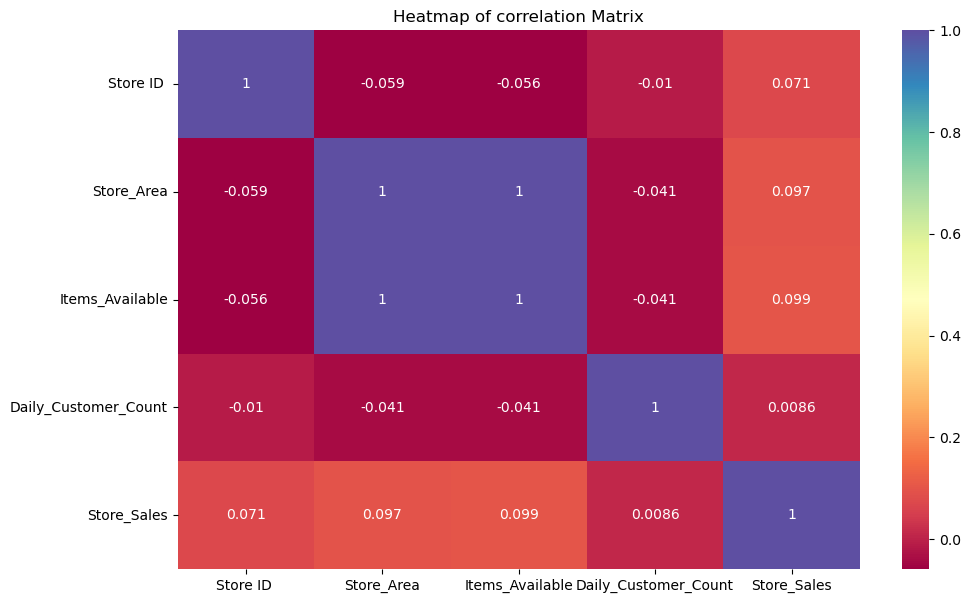

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(st.corr (), annot=True, cmap='Spectral')
plt.title('Heatmap of correlation Matrix')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Daily_Customer_Count'),
  Text(1, 0, 'Store ID '),
  Text(2, 0, 'Store_Area'),
  Text(3, 0, 'Items_Available'),
  Text(4, 0, 'Store_Sales')])

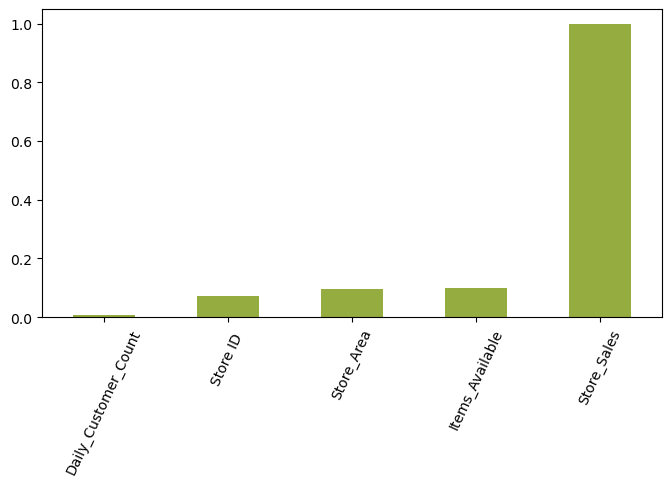

In [ ]:
st.corrwith(st['Store_Sales']).sort_values().plot(kind='bar', color=palette[3],figsize=(8,4))
plt.xticks(rotation=65)

Preproccessing

Handling Outliers

<Axes: ylabel='Frequency'>

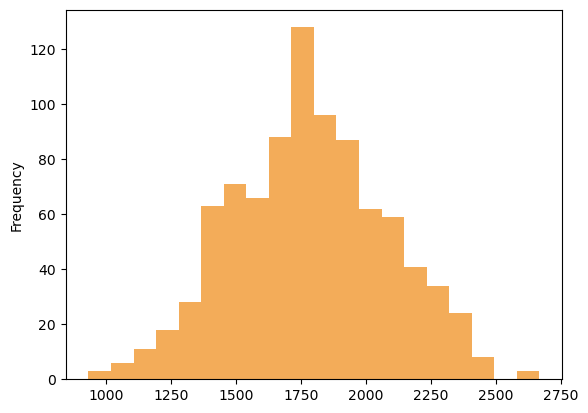

In [ ]:
st['Items_Available'].plot(kind='hist', color=palette[2],bins=20)

<Axes: ylabel='Frequency'>

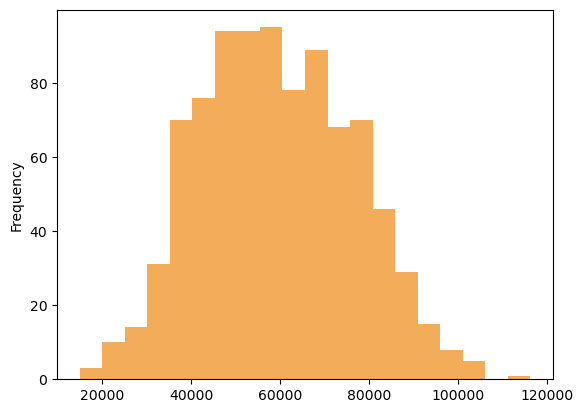

In [ ]:
st['Store_Sales'].plot(kind='hist', color=palette[2],bins=20)

In [ ]:
st['Items_Available'] = st['Items_Available'].clip(lower=1250, upper=2500)
st['Items_Available'] = st['Items_Available'].clip(lower=1250, upper=2500)

In [ ]:
st['Store_Sales'] = st['Store_Sales'].clip(lower=20000, upper=100000)
st['Store_Sales'] = st['Store_Sales'].clip(lower=20000, upper=100000)

<Axes: ylabel='Frequency'>

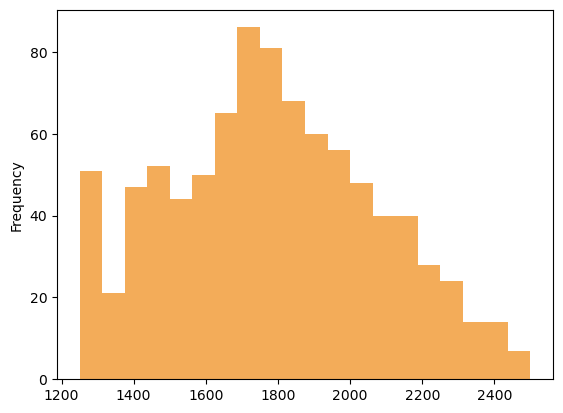

In [ ]:
st['Items_Available'].plot(kind='hist', color=palette[2],bins=20)

<Axes: ylabel='Frequency'>

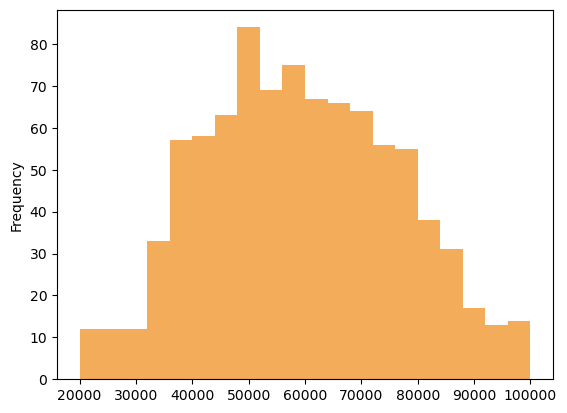

In [ ]:
st['Store_Sales'].plot(kind='hist', color=palette[2],bins=20)

<Axes: ylabel='Frequency'>

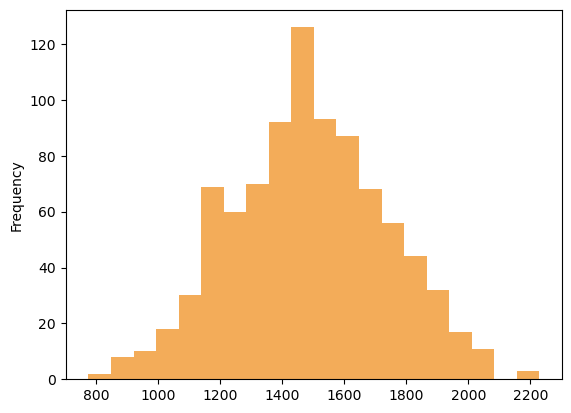

In [ ]:
st['Store_Area'].plot(kind='hist', color=palette[2],bins=20)

In [ ]:
st['Store_Area'] = st['Store_Area'].clip(lower= 1000, upper=2000 )

<Axes: ylabel='Frequency'>

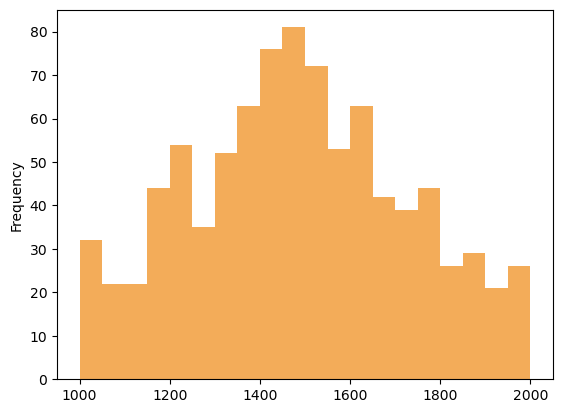

In [ ]:
st['Store_Area'].plot(kind='hist', color=palette[2],bins=20)

<Axes: ylabel='Frequency'>

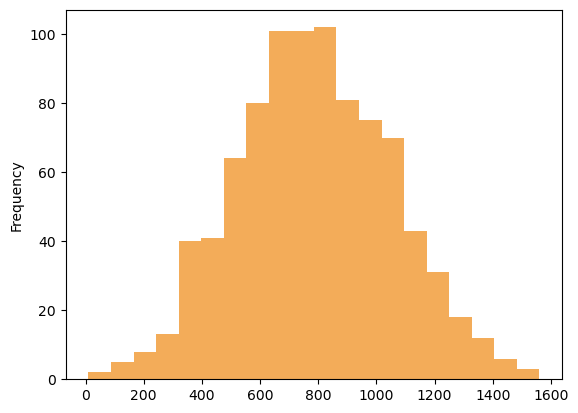

In [ ]:
st['Daily_Customer_Count'].plot(kind='hist', color=palette[2],bins=20)

In [ ]:
st['Daily_Customer_Count'] = st['Daily_Customer_Count'].clip(lower=200, upper=1400)

<Axes: ylabel='Frequency'>

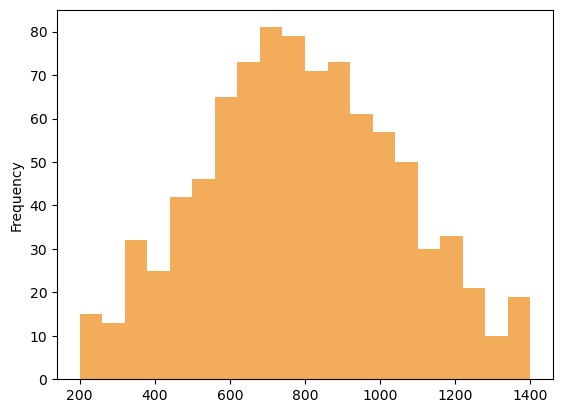

In [ ]:
st['Daily_Customer_Count'].plot(kind='hist', color=palette[2],bins=20)

In [ ]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


Modeling

Train test split

In [ ]:
st.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [ ]:
features = ['Store ID ', 'Store_Area', 'Daily_Customer_Count','Store_Sales' ]
target  = ['Items_Available']

In [ ]:

X_tr = st[features]
y_tr = st[target]
train_length = int(len(st)*0.80)
X_tr = X_tr.append(X_tr[:train_length])
X_tr = X_tr.append(X_tr[train_length:])
y_tr = y_tr.append(y_tr[:train_length])
y_tr = y_tr.append(y_tr[train_length:])

C:\Users\Liso\AppData\Local\Temp\ipykernel_12792\811777807.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_tr = X_tr.append(X_tr[:train_length])
C:\Users\Liso\AppData\Local\Temp\ipykernel_12792\811777807.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_tr = X_tr.append(X_tr[train_length:])
C:\Users\Liso\AppData\Local\Temp\ipykernel_12792\811777807.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_tr = y_tr.append(y_tr[:train_length])
C:\Users\Liso\AppData\Local\Temp\ipykernel_12792\811777807.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_tr = y_tr.append(y_tr[train_length:])


In [ ]:
print(f'shape train features {X_tr.shape}')
print(f'shape train target {y_tr.shape}')
print(f'shape test features{X_tr.shape}')
print(f'shape test target{y_tr.shape}')

shape train features (2508, 4)
shape train target (2508, 1)
shape test features(2508, 4)
shape test target(2508, 1)


Standardize

In [ ]:
std_sclr = StandardScaler().fit(X_tr)
X_tr = std_sclr.transform (X_tr)

Linear regression

In [ ]:
reg = LinearRegression().fit(X_tr , y_tr)
scr_tr_reg = reg.score(X_tr,y_tr)
scr_tr_reg

0.9962225675207746

Lasso

In [ ]:
lasso = Lasso(alpha= 4).fit(X_tr,y_tr)
scr_tr_lasso = lasso.score(X_tr,y_tr)
scr_tr_lasso

0.9960212762958822

Ridge

In [ ]:
ridge = Ridge (alpha=2).fit(X_tr, y_tr)
scr_tr_ridge = ridge.score(X_tr,y_tr)
scr_tr_ridge

0.9962219257519336

ElasticNet

In [ ]:
regr = ElasticNet (alpha= 3, l1_ratio=.6).fit(X_tr,y_tr)
scr_tr_regr = regr.score(X_tr,y_tr)
scr_tr_regr

0.6979373559054503

ARDRegression

In [ ]:
ard = ARDRegression().fit(X_tr,y_tr)
scr_tr_ard = ard.score(X_tr,y_tr)
scr_tr_ard

c:\Users\Liso\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.996220353845929

SGBRegression

In [ ]:
sgd = SGDRegressor(penalty='l2', alpha=.001, l1_ratio=.1).fit(X_tr, y_tr)
scr_tr_sgd = sgd.score(X_tr,y_tr)
scr_tr_sgd

c:\Users\Liso\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9962186931093406

SUMMARY

In [ ]:
st_scrs = [scr_tr_reg, scr_tr_reg, scr_tr_ridge, scr_tr_regr, scr_tr_ard, scr_tr_sgd]
mlds = ['Linereg', 'Lasso', 'Ridge', 'ElasticNet', 'ARDNETRegression', 'SGBRegresson']
dict_scrs = {'Train score': st_scrs , 'Test score':st_scrs}
pd.DataFrame(dict_scrs , index=mlds).sort_values('Test score')

,Train score,Test score
ElasticNet,0.697937,0.697937
SGBRegresson,0.996219,0.996219
ARDNETRegression,0.996220,0.996220
Ridge,0.996222,0.996222
Linereg,0.996223,0.996223
Lasso,0.996223,0.996223


<Axes: >

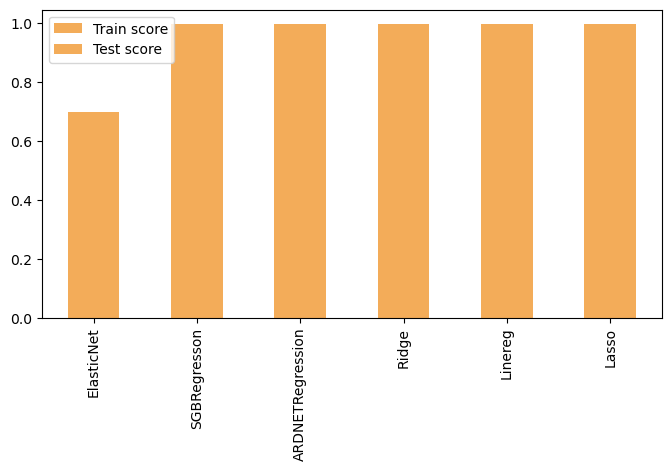

In [ ]:
pd.DataFrame(dict_scrs , index=mlds).sort_values('Test score').plot(kind='bar',figsize=(8,4), color= palette[2])